In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Use Pandas to import the data from "fcc-forum-pageviews.csv". Set the index to the date column.


In [5]:
# Import the data
df = pd.read_csv('fcc-forum-pageviews.csv', parse_dates=['date'], index_col='date')
print(df.head())

            value
date             
2016-05-09   1201
2016-05-10   2329
2016-05-11   1716
2016-05-12  10539
2016-05-13   6933


Clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.


In [13]:
print("Before removing outliers:")
print(df.describe())
df = df[(df['value'] > df['value'].quantile(0.025)) & (df['value'] < df['value'].quantile(0.975))]

print("\nAfter removing outliers:")
print(df.describe())

Before removing outliers:
               value
count     906.000000
mean    59446.932671
std     19830.779299
min     28919.000000
25%     43368.000000
50%     57197.500000
75%     72587.500000
max    101275.000000

After removing outliers:
              value
count    860.000000
mean   59168.255814
std    18611.335277
min    30079.000000
25%    44063.250000
50%    57197.500000
75%    71656.750000
max    98515.000000


Create a draw_line_plot function that uses Matplotlib to draw a line chart similar to "examples/Figure_1.png". The title should be Daily freeCodeCamp Forum Page Views 5/2016-12/2019. The label on the x axis should be Date and the label on the y axis should be Page Views.


Text(0.5, 1.0, 'Daily freeCodeCamp Forum Page Views 5/2016-12/2019')

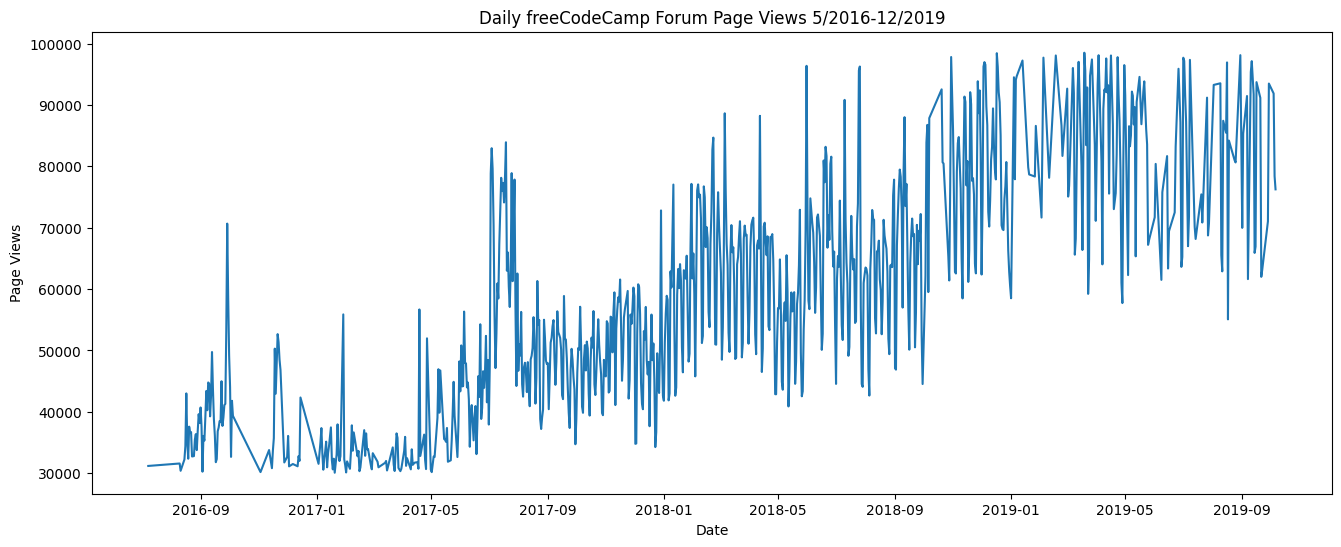

In [14]:
#def draw_line_plot():

# Plot the line chart=
fig, ax = plt.subplots(figsize=(16, 6))
ax = sns.lineplot(data=df, x='date', y='value')
plt.xlabel('Date')
plt.ylabel('Page Views')
plt.title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')


# Save image and return fig (don't change this part)
# fig.savefig('line_plot.png')
# return fig

Create a draw_bar_plot function that draws a bar chart similar to "examples/Figure_2.png". It should show average daily page views for each month grouped by year. The legend should show month labels and have a title of Months. On the chart, the label on the x axis should be Years and the label on the y axis should be Average Page Views.


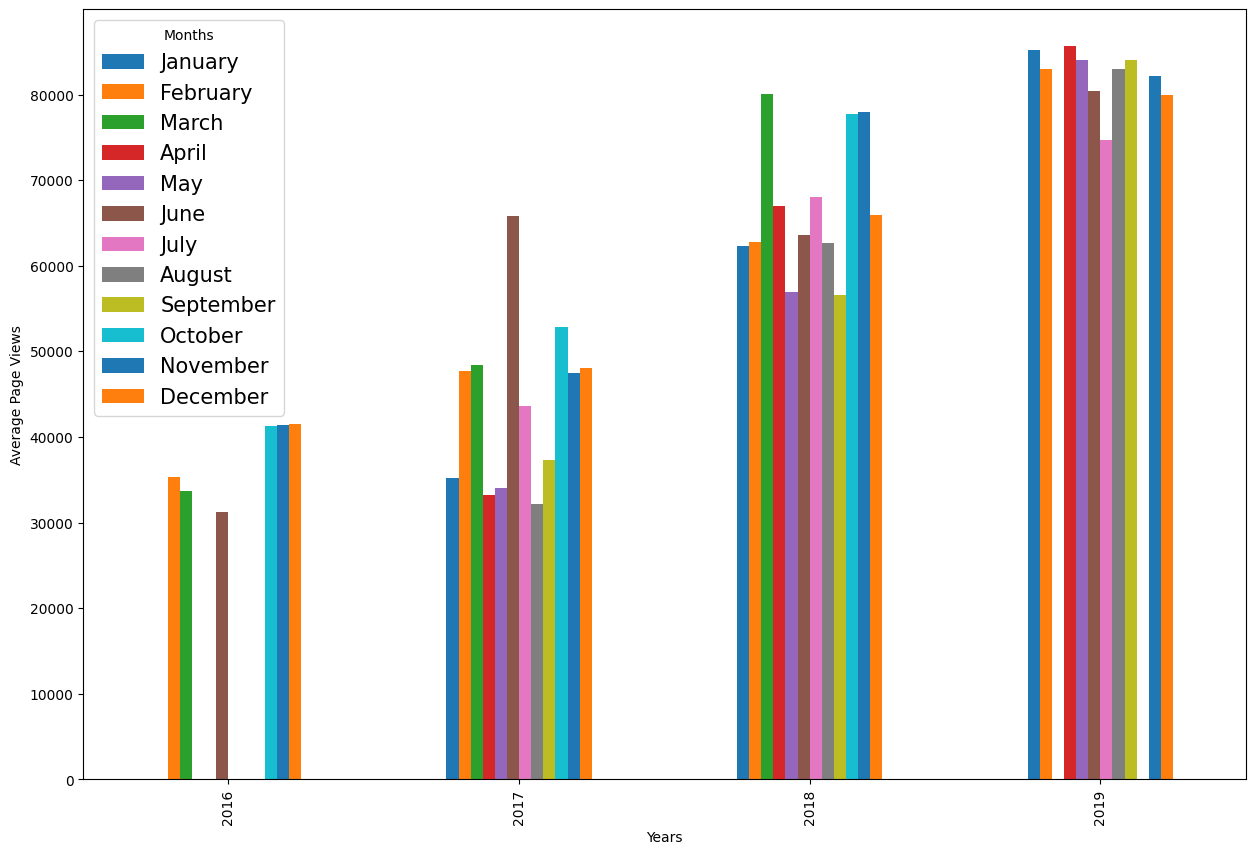

In [25]:
#def draw_bar_plot():

#copy the data
df_bar = df.copy().reset_index()

#add year and month columns:
df_bar['year'] = [d.year for d in df_bar.date]
df_bar['month'] = [d.strftime('%B') for d in df_bar.date]

#group by month and year:
df_bar = df_bar.groupby(['year', 'month'])['value'].mean()
#unstack for plotting:
df_bar = df_bar.unstack()
#set columns for legend
df_bar.columns = ['January','February','March','April','May','June','July','August','September','October','November','December']

# Draw bar plot
fig = df_bar.plot(kind= 'bar', figsize = (15,10)).figure

plt.title('')
plt.xlabel('Years')
plt.ylabel('Average Page Views')
plt.legend(title= 'Months', fontsize = 15)


Create a draw_box_plot function that uses Seaborn to draw two adjacent box plots similar to "examples/Figure_3.png". These box plots should show how the values are distributed within a given year or month and how it compares over time. The title of the first chart should be Year-wise Box Plot (Trend) and the title of the second chart should be Month-wise Box Plot (Seasonality). Make sure the month labels on bottom start at Jan and the x and y axis are labeled correctly. The boilerplate includes commands to prepare the data.


Text(0, 0.5, 'Page Views')

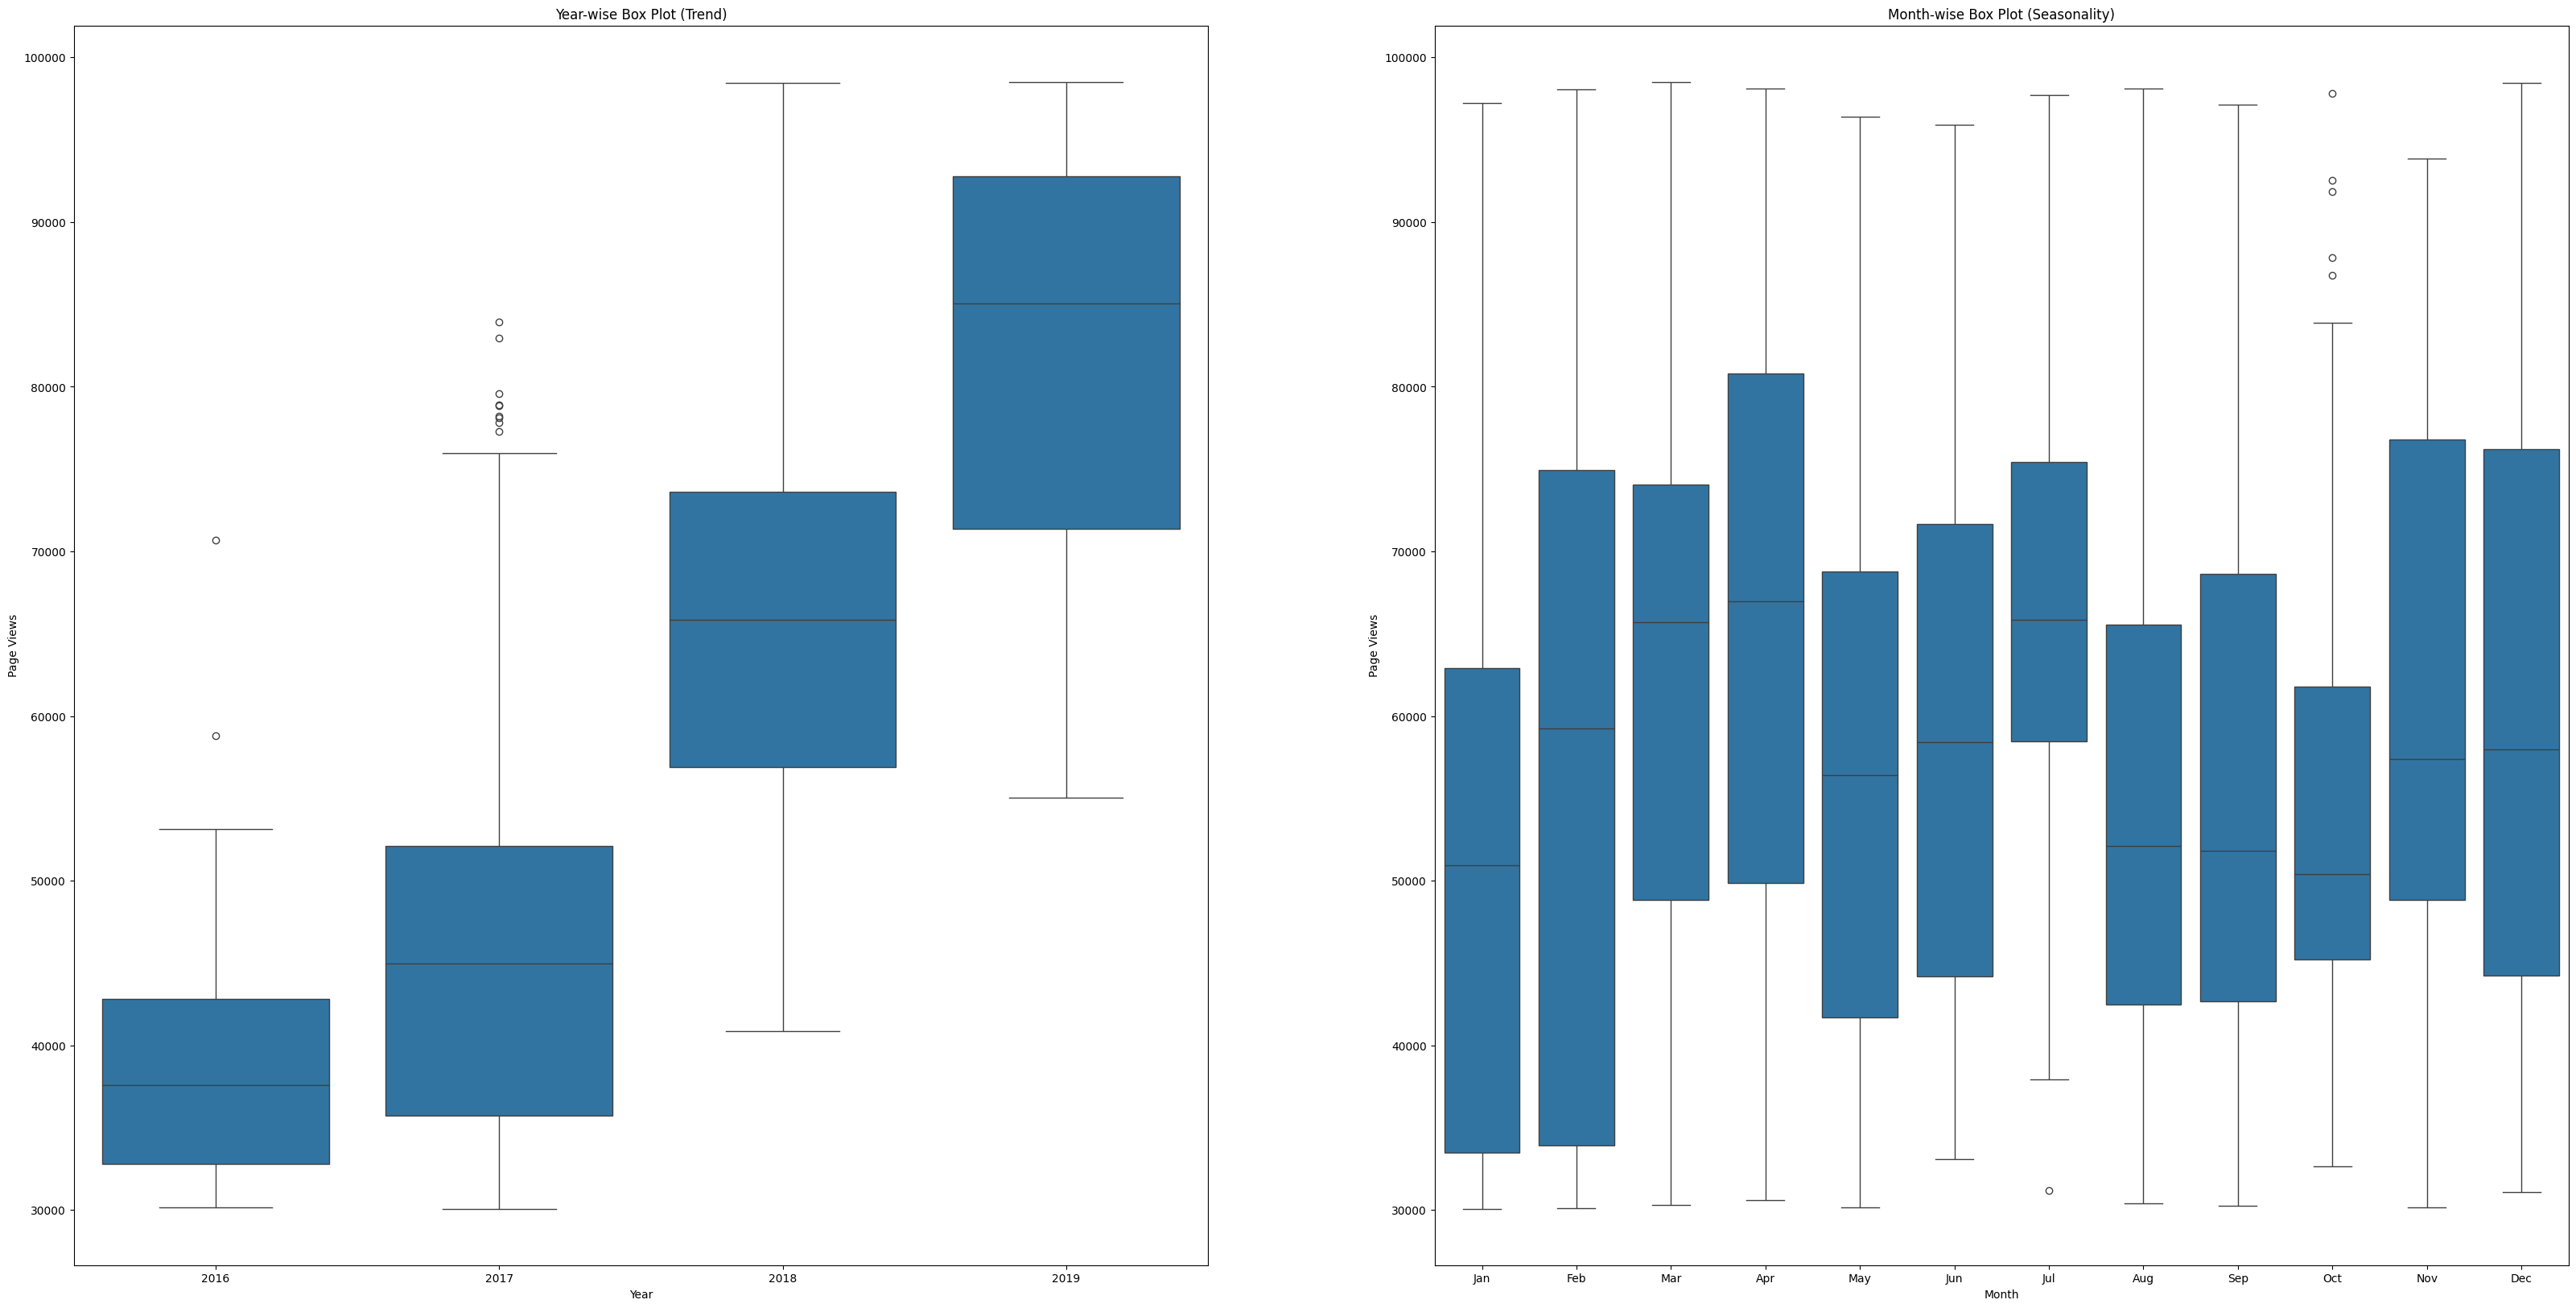

In [26]:
#def draw_box_plot():
# Prepare data for box plots
df_box = df.copy().reset_index()
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]

# Draw box plots (using Seaborn)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(40, 20))
sns.boxplot(ax=ax1, x="year", y= "value", data=df_box)
ax1.set_title("Year-wise Box Plot (Trend)")
ax1.set_xlabel("Year")
ax1.set_ylabel("Page Views")

months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

sns.boxplot(ax=ax2, x="month", y= "value", data=df_box, order = months)
ax2.set_title("Month-wise Box Plot (Seasonality)")
ax2.set_xlabel("Month")
ax2.set_ylabel("Page Views")

# Save image and return fig (don't change this part)
#fig.savefig('box_plot.png')
#return fig